<a href="https://colab.research.google.com/github/kridtapon/Cloud-Breaker-Strategy/blob/main/Cloud_Breaker_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.0 MB/s eta 0:00:00


In [2]:
pip install --upgrade yfinance

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Ichimoku Cloud components
def calculate_ichimoku(df, tenkan_period=9, kijun_period=26, senkou_span_b_period=52):
    """
    Calculate Ichimoku Cloud components.
    """
    # Tenkan-Sen (Conversion Line)
    df['Tenkan_Sen'] = (df['High'].rolling(window=tenkan_period).max() + df['Low'].rolling(window=tenkan_period).min()) / 2

    # Kijun-Sen (Base Line)
    df['Kijun_Sen'] = (df['High'].rolling(window=kijun_period).max() + df['Low'].rolling(window=kijun_period).min()) / 2

    # Senkou Span A (Leading Span A)
    df['Senkou_Span_A'] = ((df['Tenkan_Sen'] + df['Kijun_Sen']) / 2).shift(kijun_period)

    # Senkou Span B (Leading Span B)
    df['Senkou_Span_B'] = ((df['High'].rolling(window=senkou_span_b_period).max() + df['Low'].rolling(window=senkou_span_b_period).min()) / 2).shift(kijun_period)

    # Chikou Span (Lagging Line)
    df['Chikou_Span'] = df['Close'].shift(-kijun_period)

    return df

# Define the stock symbol and time period
symbol = 'UBER'  # SPY is the symbol for the S&P 500 ETF
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Ichimoku Cloud components
df = calculate_ichimoku(df)

# Define Entry and Exit signals based on Ichimoku Cloud Breakout Strategy

# Bullish Entry (Long position)
df['Entry'] = (df['Close'] > df['Senkou_Span_A']) | \
                   (df['Close'] > df['Senkou_Span_B']) | \
                   (df['Tenkan_Sen'] > df['Kijun_Sen'])

# Exit signals: When price crosses back below or above the cloud
df['Exit'] = (df['Close'] < df['Senkou_Span_A']) | (df['Close'] < df['Senkou_Span_B'])

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           127827.389058
Total Return [%]                        27.827389
Benchmark Return [%]                    94.643434
Max Gross Exposure [%]                      100.0
Total Fees Paid                        3955.11216
Max Drawdown [%]                        58.857325
Max Drawdown Duration                       978.0
Total Trades                                   18
Total Closed Trades                            18
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            33.333333
Best Trade [%]                          53.007286
Worst Trade [%]                        -19.271409
Avg Winning Trade [%]                   25.034734
Avg Losing Trade [%]                     -7.89531


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: 

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           149709.665747
Total Return [%]                        49.709666
Benchmark Return [%]                    13.638527
Max Gross Exposure [%]                      100.0
Total Fees Paid                       2975.810798
Max Drawdown [%]                        20.922011
Max Drawdown Duration                       420.0
Total Trades                                   12
Total Closed Trades                            11
Total Open Trades                               1
Open Trade PnL                       -5877.841494
Win Rate [%]                            27.272727
Best Trade [%]                          53.223098
Worst Trade [%]                         -4.463528
Avg Winning Trade [%]                   28.919476
Avg Losing Trade [%]                    -3.389426


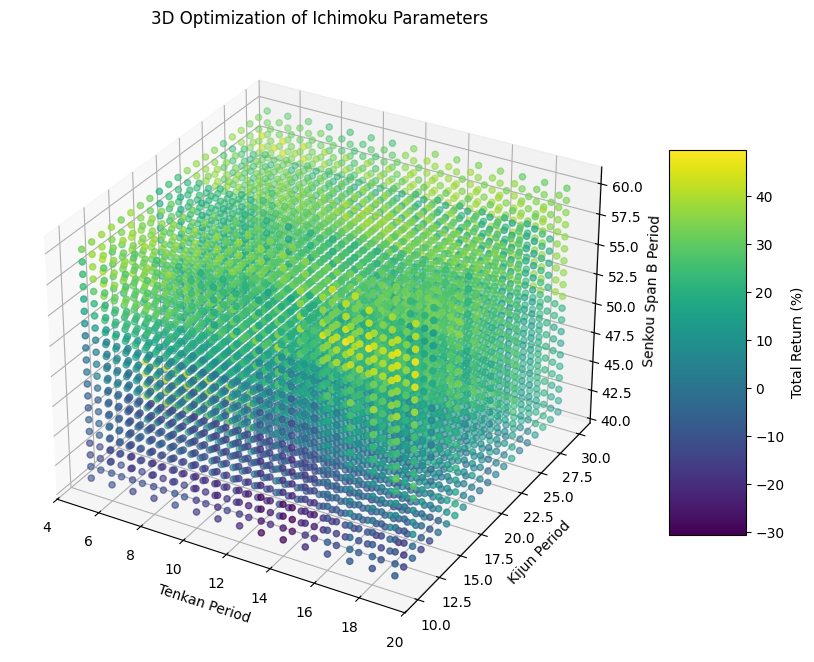

Best Parameters:
Tenkan_Period           17.000000
Kijun_Period            12.000000
Senkou_Span_B_Period    57.000000
Total_Return            49.709666
Name: 5096, dtype: float64


In [25]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Ichimoku Cloud components
def calculate_ichimoku(df, tenkan_period=9, kijun_period=26, senkou_span_b_period=52):
    tenkan_period = int(tenkan_period)
    kijun_period = int(kijun_period)
    senkou_span_b_period = int(senkou_span_b_period)

    df['Tenkan_Sen'] = (df['High'].rolling(window=tenkan_period).max() + df['Low'].rolling(window=tenkan_period).min()) / 2
    df['Kijun_Sen'] = (df['High'].rolling(window=kijun_period).max() + df['Low'].rolling(window=kijun_period).min()) / 2
    df['Senkou_Span_A'] = ((df['Tenkan_Sen'] + df['Kijun_Sen']) / 2).shift(kijun_period)
    df['Senkou_Span_B'] = ((df['High'].rolling(window=senkou_span_b_period).max() + df['Low'].rolling(window=senkou_span_b_period).min()) / 2).shift(kijun_period)
    df['Chikou_Span'] = df['Close'].shift(-kijun_period)

    return df

# Define the stock symbol and time period
symbol = 'SBUX'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Define the parameter ranges for optimization
tenkan_range = range(5, 20)  # Example range for tenkan_period
kijun_range = range(10, 31)  # Example range for kijun_period
senkou_range = range(41, 61)  # Example range for senkou_span_b_period

# Create all combinations of the parameters
param_combinations = list(itertools.product(tenkan_range, kijun_range, senkou_range))

# Store performance results
results = []

# Loop through each combination of parameters and perform backtest
for tenkan_period, kijun_period, senkou_span_b_period in param_combinations:
    # Calculate Ichimoku Cloud components with current parameters
    temp_df = df.copy()
    temp_df = calculate_ichimoku(temp_df, tenkan_period, kijun_period, senkou_span_b_period)

    # Define Entry and Exit signals based on Ichimoku Cloud Breakout Strategy
    temp_df['Entry'] = (temp_df['Close'] > temp_df['Senkou_Span_A']) | \
                        (temp_df['Close'] > temp_df['Senkou_Span_B']) | \
                        (temp_df['Tenkan_Sen'] > temp_df['Kijun_Sen'])
    temp_df['Exit'] = (temp_df['Close'] < temp_df['Senkou_Span_A']) | (temp_df['Close'] < temp_df['Senkou_Span_B'])

    # Filter data for the test period (2020-2025)
    df_filter = temp_df[(temp_df.index.year >= 2020) & (temp_df.index.year <= 2025)]

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_filter['Close'],
        entries=df_filter['Entry'],
        exits=df_filter['Exit'],
        init_cash=100_000,
        fees=0.001
    )

    # Collect performance stats (e.g., Total Return)
    results.append({
        'Tenkan_Period': tenkan_period,
        'Kijun_Period': kijun_period,
        'Senkou_Span_B_Period': senkou_span_b_period,
        'Total_Return': portfolio.stats()['Total Return [%]']
    })

# Convert results to DataFrame for easy sorting
results_df = pd.DataFrame(results)

# Find the best parameters based on Total Return
best_params = results_df.loc[results_df['Total_Return'].idxmax()]

# Optionally, plot the equity curve of the best combination
best_combination = (best_params['Tenkan_Period'], best_params['Kijun_Period'], best_params['Senkou_Span_B_Period'])
temp_df = df.copy()
temp_df = calculate_ichimoku(temp_df, *best_combination)
temp_df['Entry'] = (temp_df['Close'] > temp_df['Senkou_Span_A']) | \
                    (temp_df['Close'] > temp_df['Senkou_Span_B']) | \
                    (temp_df['Tenkan_Sen'] > temp_df['Kijun_Sen'])
temp_df['Exit'] = (temp_df['Close'] < temp_df['Senkou_Span_A']) | (temp_df['Close'] < temp_df['Senkou_Span_B'])

# Filter data for the test period (2020-2025)
df_filter = temp_df[(temp_df.index.year >= 2020) & (temp_df.index.year <= 2025)]

# Backtest with best parameters
portfolio = vbt.Portfolio.from_signals(
    close=df_filter['Close'],
    entries=df_filter['Entry'],
    exits=df_filter['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Plot the equity curve for the best parameter combination
portfolio.plot().show()

print(portfolio.stats())

# Create a 3D plot of Total Return based on parameter optimization
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the results in 3D
scat = ax.scatter(results_df['Tenkan_Period'], results_df['Kijun_Period'], results_df['Senkou_Span_B_Period'], c=results_df['Total_Return'], cmap='viridis')

# Labels and title
ax.set_xlabel('Tenkan Period')
ax.set_ylabel('Kijun Period')
ax.set_zlabel('Senkou Span B Period')
ax.set_title('3D Optimization of Ichimoku Parameters')

# Add color panel (colorbar) for Total Return
cbar = fig.colorbar(scat, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Total Return (%)')

# Show the plot
plt.show()

# Print the best parameters
print("Best Parameters:")
print(best_params)
